# Part 1

# Load and Format Data

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
pd.options.display.max_columns = 50
import pylab as pl
from sklearn import tree
import graphviz
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/matthew/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('breast-cancer.csv')

# Explore Data, mean and median smoothness

In [3]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.groupby('diagnosis').mean()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [7]:
df.groupby('diagnosis').std()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.589180,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
M,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553


In [8]:
df.groupby('diagnosis').median()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,908916.0,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,0.2575,1.1080,1.8510,19.630,0.006530,0.01631,0.018400,0.009061,0.01909,0.002808,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,895366.5,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,0.5472,1.1025,3.6795,58.455,0.006209,0.02859,0.037125,0.014205,0.01770,0.003739,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [9]:
df.loc[df['diagnosis'] == 'M']['smoothness_mean'].mean()

4.323929245283021

In [10]:
df.loc[df['diagnosis'] == 'M']['smoothness_mean'].std()

2.5685456540541707

In [11]:
df.loc[df['diagnosis'] == 'B']['smoothness_mean'].mean()

2.0003212885154085

In [12]:
df.loc[df['diagnosis'] == 'B']['smoothness_mean'].std()

0.7711692027100456

In [13]:
df.loc[df['diagnosis'] == 'M']['smoothness_mean'].median()

3.6795

In [14]:
df.loc[df['diagnosis'] == 'B']['smoothness_mean'].median()

1.851

In [15]:
df.loc[df['diagnosis'] == 'M']['compactness_mean'].mean()

0.03228116509433961

In [16]:
df.loc[df['diagnosis'] == 'M']['compactness_mean'].std()

0.01838718992099185

In [17]:
df.loc[df['diagnosis'] == 'B']['compactness_mean'].mean()

0.02143824649859945

In [18]:
df.loc[df['diagnosis'] == 'B']['compactness_mean'].std()

0.01635151136043786

In [19]:
df.loc[df['diagnosis'] == 'M']['compactness_mean'].median()

0.02859

In [20]:
df.loc[df['diagnosis'] == 'B']['compactness_mean'].median()

0.016309999999999998

# Random Sample

In [21]:
# Transform the data to a format our regressions can read.
df['diagnosis'] = df['diagnosis'].replace('M', 1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)

In [40]:
def sampler(sample, percent, train, test):
    msk = np.random.rand(len(sample)) < percent
    train = sample[msk]
    test = sample[msk]

In [41]:
sampler(df, 0.8, train, test)

In [22]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]
X_train = train.drop(['diagnosis', 'ID'], 1)
y_train = train['diagnosis']
X_test = test.drop(['diagnosis', 'ID'], 1)
y_test = test['diagnosis']

# Decision Tree

In [23]:
clf = tree.DecisionTreeClassifier()

In [24]:
clf = clf.fit(X_train, y_train)

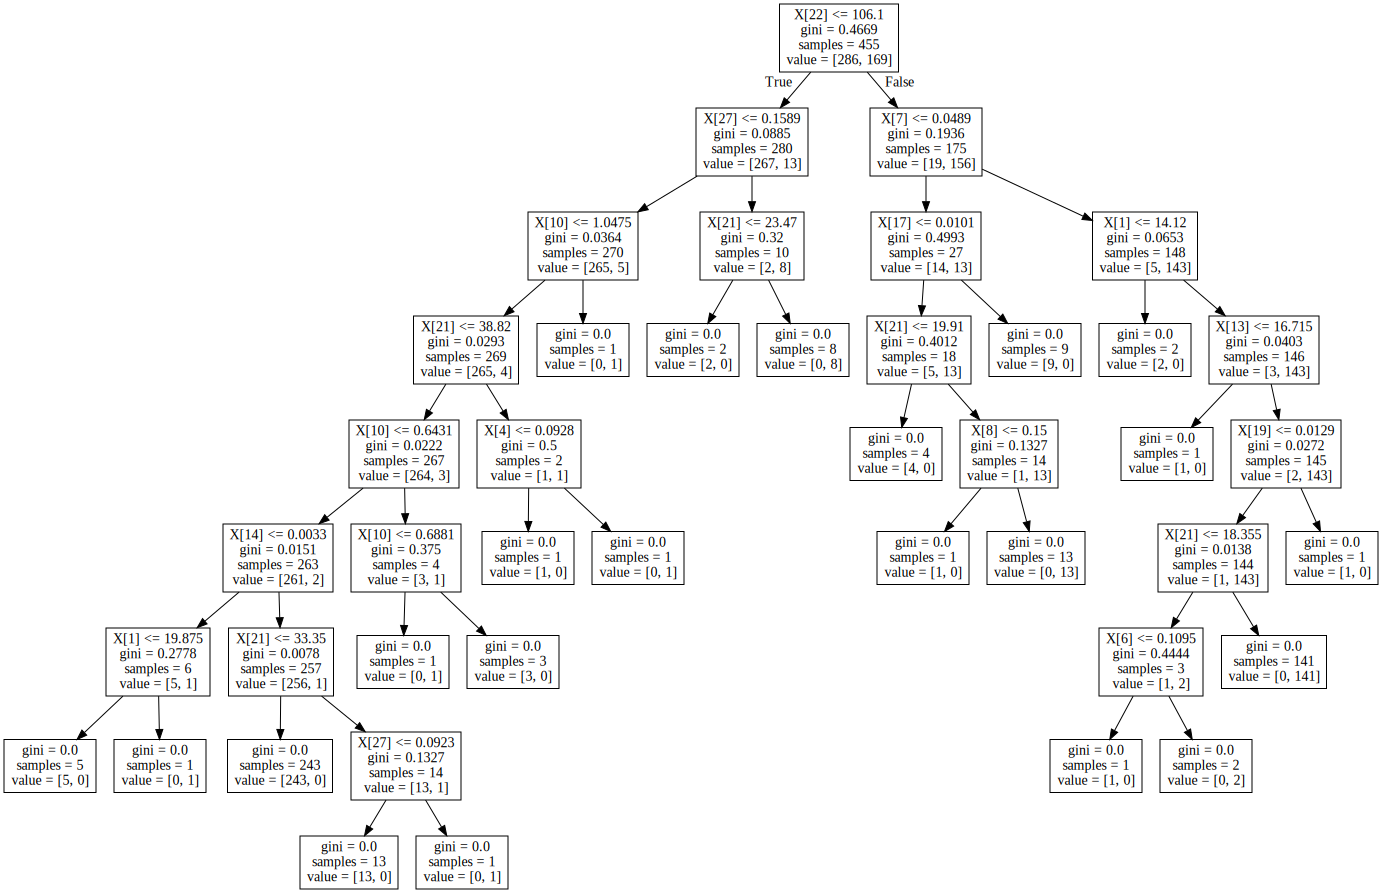

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("iris") 
graph

# Feature Importance with Random Forest

In [26]:
X = df.drop(['diagnosis'], 1)
y = df['diagnosis']

In [27]:
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.3145, 'concave_points_sd_error'), (0.2233, 'perimeter_sd_error'), (0.1956, 'fractal_dimension_mean'), (0.1165, 'concave_points_worst'), (0.0211, 'concavity_worst'), (0.018, 'concave_points_mean'), (0.0167, 'radius_sd_error'), (0.0118, 'symmetry_mean'), (0.0114, 'symmetry_worst'), (0.0096, 'ID'), (0.0095, 'smoothness_sd_error'), (0.0085, 'fractal_dimension_sd_error'), (0.0053, 'fractal_dimension_worst'), (0.0051, 'texture_mean'), (0.004, 'area_sd_error'), (0.0037, 'texture_sd_error'), (0.0036, 'compactness_worst'), (0.0034, 'radius_mean'), (0.0032, 'concavity_sd_error'), (0.0026, 'smoothness_mean'), (0.0023, 'smoothness_worst'), (0.0018, 'compactness_sd_error'), (0.0017, 'concavity_mean'), (0.0014, 'compactness_mean'), (0.0014, 'area_mean'), (0.0013, 'symmetry_sd_error'), (0.001, 'perimeter_mean'), (0.0007, 'area_worst'), (0.0005, 'texture_worst'), (0.0004, 'radius_worst'), (0.0, 'perimeter_worst')]


The standard error of Concave Points, the standard error of the perimeter, and fractal dimension mean are the most important features from our Random Forest Regressor.

# OLS Regression

In [42]:
# It is important when doing an OLS regression to split your data into a training and testing data set.

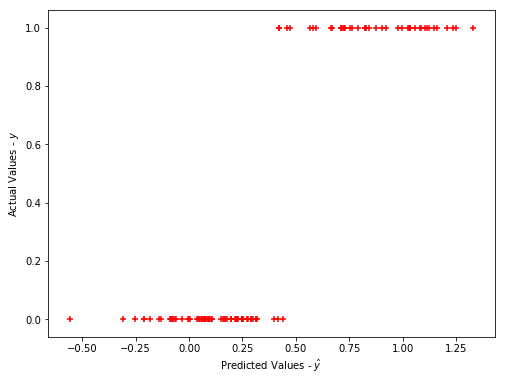

MSE: 0.0540209854776


In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y_test, predictions)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     79.58
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          2.94e-154
Time:                        15:41:44   Log-Likelihood:                 9.5989
No. Observations:                 455   AIC:                             40.80
Df Residuals:                     425   BIC:                             164.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
radius_mean                   -0.4326      0.204     -2.124      0.034      -0.833      -0.032
radius_sd_error                0.0076      0.010      0.778      0.437      -0.012       0.027
radius_worst                   0.0340      0.030      1.148      0.251      -0.024       0.092
texture_mean                   0.0015      0.001      2.560      0.011       0.000       0.003
texture_sd_error               1.4063      2.425      0.580      0.562      -3.360       6.173
texture_worst                 -1.9459      1.447     -1.345      0.179      -4.790       0.898
perimeter_mean                 0.8787      1.204      0.730      0.466      -1.488       3.245
perimeter_sd_error             2.4853      2.290      1.085      0.278      -2.017       6.987
perimeter_worst               -0.8993      0.846     -1.063      0.289      -2.563       0.764
area_mean                    -17.7035      4.647     -3.810      0.000     -26.837      -8.570
area_sd_error                  0.3222      0.369      0.874      0.383      -0.403       1.047
area_worst                    -0.0276      0.050     -0.550      0.583      -0.126       0.071
smoothness_mean                0.0066      0.048      0.138      0.890      -0.087       0.100
smoothness_sd_error           -0.0021      0.002     -1.135      0.257      -0.006       0.002
smoothness_worst              18.8292      7.812      2.410      0.016       3.475      34.184
compactness_mean              -1.9460      2.397     -0.812      0.417      -6.657       2.765
compactness_sd_error          -2.7892      1.479     -1.886      0.060      -5.695       0.117
compactness_worst             11.1256      6.666      1.669      0.096      -1.977      24.229
concavity_mean                 0.7212      3.181      0.227      0.821      -5.530       6.973
concavity_sd_error             7.6595     12.458      0.615      0.539     -16.828      32.147
concavity_worst                0.2638      0.067      3.925      0.000       0.132       0.396
concave_points_mean            0.0063      0.009      0.714      0.476      -0.011       0.024
concave_points_sd_error       -0.0087      0.007     -1.271      0.205      -0.022       0.005
concave_points_worst          -0.0012      0.000     -3.066      0.002      -0.002      -0.000
symmetry_mean                 -0.8564      1.632     -0.525      0.600      -4.065       2.352
symmetry_sd_error              0.2587      0.442      0.585      0.559      -0.610       1.128
symmetry_worst                 0.2799      0.304      0.921      0.358      -0.317       0.877
fractal_dimension_mean         0.6544      1.074      0.609      0.543      -1.456       2.765
fractal_dimension_sd_error     0.8062      0.559      1.443      0.150      -0.292       1.905
fractal_dimension_worst        4.3384      

In [30]:
X = df[['texture_mean','area_mean','smoothness_worst','concavity_worst','concave_points_worst','fractal_dimension_worst','diagnosis']]
test = X[0:100]
train = X[100:]
X_train = train.drop(['diagnosis'], 1)
y_train = train['diagnosis']
X_test = test.drop(['diagnosis'], 1)
y_test = test['diagnosis']

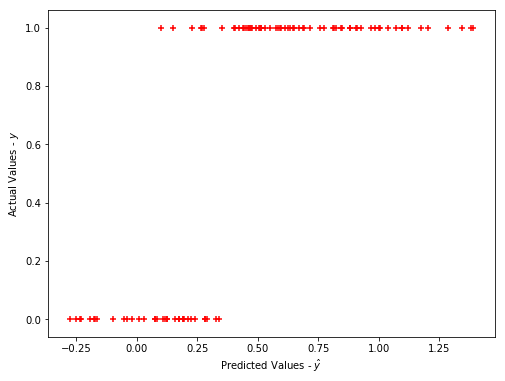

MSE: 0.130965454272


In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y_test, predictions)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     253.6
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          7.40e-143
Time:                        15:41:44   Log-Likelihood:                -52.108
No. Observations:                 469   AIC:                             116.2
Df Residuals:                     463   BIC:                             141.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
texture_mean            -5.746e-05      0.000     -0.379      0.705      -0.000       0.000
area_mean                 -32.4188      2.640    -12.281      0.000     -37.606     -27.232
smoothness_worst           30.2640      4.859      6.228      0.000      20.715      39.813
concavity_worst             0.0616      0.011      5.370      0.000       0.039       0.084
concave_points_worst     3.133e-05      0.000      0.310      0.757      -0.000       0.000
fractal_dimension_worst    14.0349      1.279     10.972      0.000      11.521      16.549
==============================================================================
Omnibus:                       40.008   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.631
Skew:                           0.717   Prob(JB):                     2.75e-11
Kurtosis:                       3.655   Cond. No.                     5.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = df[['area_mean','smoothness_worst','concavity_worst','fractal_dimension_worst','diagnosis']]
test = X[0:100]
train = X[100:]
X_train = train.drop(['diagnosis'], 1)
y_train = train['diagnosis']
X_test = test.drop(['diagnosis'], 1)
y_test = test['diagnosis']

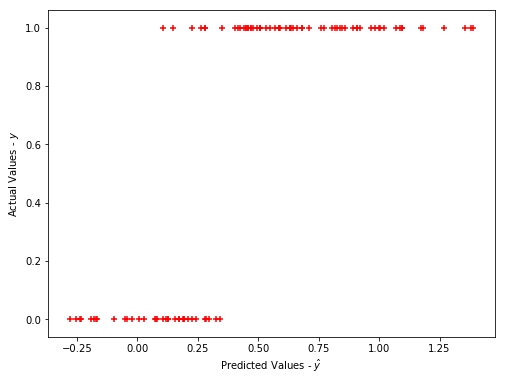

MSE: 0.130919766298


In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y_test, predictions)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     381.9
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          2.11e-145
Time:                        15:41:45   Log-Likelihood:                -52.194
No. Observations:                 469   AIC:                             112.4
Df Residuals:                     465   BIC:                             129.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area_mean                 -32.5658      1.848    -17.617      0.000     -36.198     -28.933
smoothness_worst           30.1289      4.563      6.603      0.000      21.163      39.095
concavity_worst             0.0610      0.002     26.117      0.000       0.056       0.066
fractal_dimension_worst    14.1538      1.214     11.659      0.000      11.768      16.539
==============================================================================
Omnibus:                       40.162   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.906
Skew:                           0.718   Prob(JB):                     2.40e-11
Kurtosis:                       3.663   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = df[['area_mean','concavity_worst','fractal_dimension_worst','diagnosis']]
test = X[0:100]
train = X[100:]
X_train = train.drop(['diagnosis'], 1)
y_train = train['diagnosis']
X_test = test.drop(['diagnosis'], 1)
y_test = test['diagnosis']

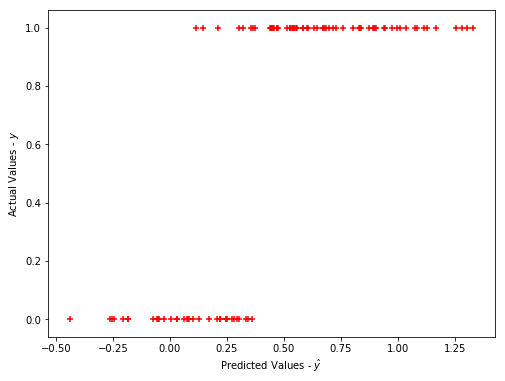

MSE: 0.129666033939


In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y_test, predictions)

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     453.2
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          9.94e-138
Time:                        15:41:45   Log-Likelihood:                -73.213
No. Observations:                 469   AIC:                             152.4
Df Residuals:                     466   BIC:                             164.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area_mean                 -26.2829      1.656    -15.875      0.000     -29.536     -23.029
concavity_worst             0.0584      0.002     24.295      0.000       0.054       0.063
fractal_dimension_worst    12.4803      1.240     10.062      0.000      10.043      14.918
==============================================================================
Omnibus:                       24.291   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.883
Skew:                           0.584   Prob(JB):                     1.45e-06
Kurtosis:                       3.104   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This method, of using Ordinary Least Squares has the advantage that it is easy to code, and easy to interpret. You can easily see that the type of cancer can be predicted if you know the area, worst smoothness, worst concavity, and worst fractal dimension of the Cancer Patient. You will be right 76.7% of the time. when you run a point through the model, if you get a value of 0.5 you can be very certain the candidate has malignant cancer, and if they have a value less than 0.25 you can be very certain they have benign cancer.

The area, concavity, and Fractal dimension are the most important features.

# For professionals
The limitation of this analysis we don't know demographic data on the patients, such as their age, whether they smoked, or other information on the patients. In a further sample I would want to know about the patients to see if those features matter. It makes it difficult to know when extrapolating this data to more people because we don't know how representative our sample is.

Also, it would be useful to try using methods which hit a balance between variance and bias.

# For lay people
My analysis shows that knowing the area, concavity, and worst fractal dimension of breast cancer are the most important features to determine whether the breast cancer is malignant or benign for a population similar to our sample.

# Random Forest or OLS?
Random Forests have low bias but very high variance. OLS Regression has high bias, but can also have low variance. Which one you choose for a particular model will determine on whether it more important to have low bias or low variance. This is why they can give you different answers. This is why we usually do more than one test to find the important features. If they give you wildly different answers, it could warrant further investigation.

# Part 2

In [2]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

ImportError: cannot import name LinearRegression

In [3]:
#Error 1
# In order to correctly import the model, you need to specify the subdirectory of sklearn in this case.
from sklearn.linear_model import LinearRegression

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'data' is not defined

# Error 2
data is not defined. Python doesn't know what to do with it.


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('train.csv')


# Setup data for prediction
x1 = d.SalaryNormalized
x2 = pd.get_dummies(d.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

ValueError: k-fold cross validation requires at least one train / test split by setting n_folds=2 or more, got n_folds=1.

# Error 3
k-fold cross validation works by comparing how an algorithm works on multiple folds, so cv has to be an integer greater than 1 in order for it to work. If you have only one sample, there is nothing to cross-check your model against.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('train.csv')


# Setup data for prediction
x1 = d.SalaryNormalized
x2 = pd.get_dummies(d.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=4, scoring='mean_absolute_error')
print(scores.mean())

-11766.4002944


/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

#### This works, it tells us that our cross-validation score is -11766.4 when we have our set up correctly.

# Convenience Tip
We generally put our imports at the top of the page, so that everything is imported first, because it makes coding easier when you are writing a lot. It isn't wrong, it is just inconvenient. 

# Convention Tip
as is normal in mathematics, we generally name our functions y and X by convention. x1 and x2 are not wrong, but it makes it easier to read and will fit into formulas you find when you look for tools online.